The model is currently accessible via https://cs180-project.up.railway.app/.
The github respository is acessible via 
https://github.com/Pr0gr4m3/CS-180-Project.

### **Loading the dataset**
Load the Sleep Efficiency dataset from Kaggle. It will be used to build a simple linear regression model to predict Sleep efficiency (dependent/target variable) based on the factors (independent variable) in the dataset.







In [27]:
# Load the dataset
from google.colab import files
from io import StringIO
import pandas as pd
data = files.upload()
data = pd.read_csv(StringIO(list(data.values())[0].decode()))

Saving Sleep_Efficiency.csv to Sleep_Efficiency (1).csv


### **Preprocessing**
Data formatting and cleaning. First, assign numerical values to categorical data in order for regression to work. Since the only categorical data are binary, we do not have to add any columns, and simply assign 1 to one category and 0 to the other. Finally, remove the rows with missing values.







In [28]:
# Preprocessing
# Assign numerical values to categorical data
data['Gender'] = data['Gender'].map({'Male': 1,'Female': 0})
data['Smoking status'] = data['Smoking status'].map({'Yes': 1,'No': 0})

# Remove rows with missing values
data.dropna(inplace=True)
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


### **Understanding the data**
Let us first check the data's features. We then create a correlation heatmap of the data in order for us to determine which features are most useful in predicting sleep efficiency.

In [29]:
data.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

<ipython-input-30-5eaffae1d7da>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='crest', linewidth=.5)


<Axes: >

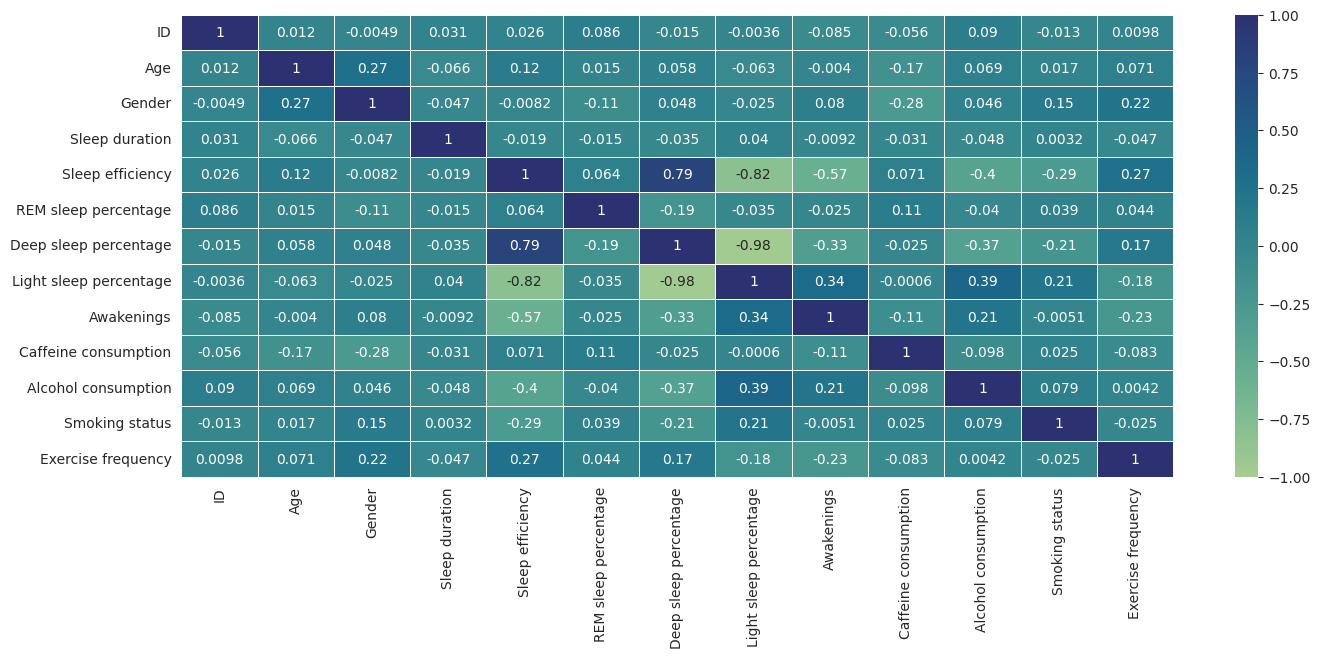

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


#correlation of all numerical features
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='crest', linewidth=.5)
heatmap

We can see that the features 'Deep sleep percentage', 'Light sleep percentage', and 'Awakenings' share the highest correlation, with `|r| > 0.5`. This is followed by 'Alcohol consumption'. 'Smoking status', 'Exercise frequency', and 'Age'.

### **Determining if Linear Regression is an ideal method**

Below, we can see that, generally, people's sleep efficiency increases as they age.

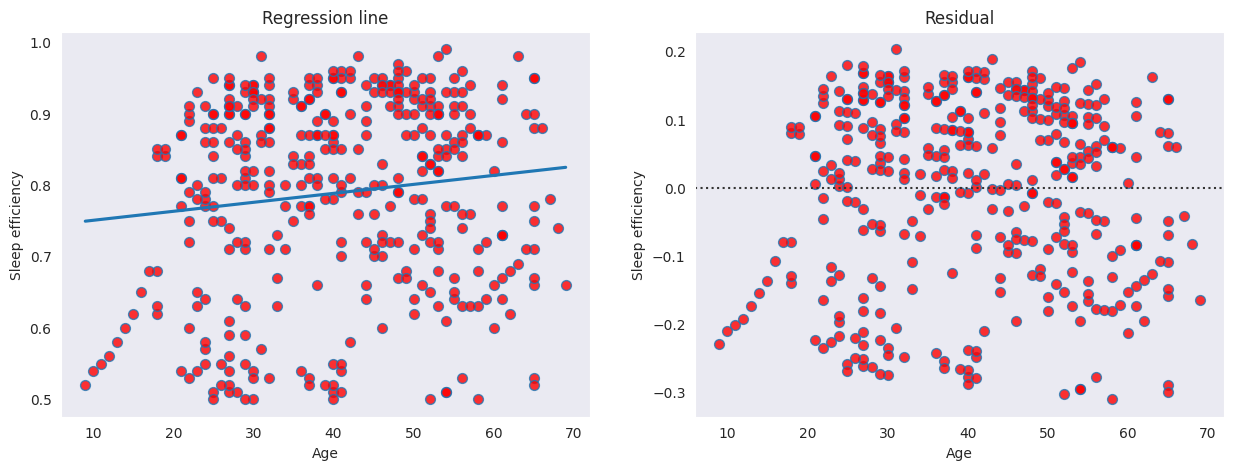

In [31]:
# Age
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Age', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Age', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

However, sleep efficiency does not appear to be affected by gender.

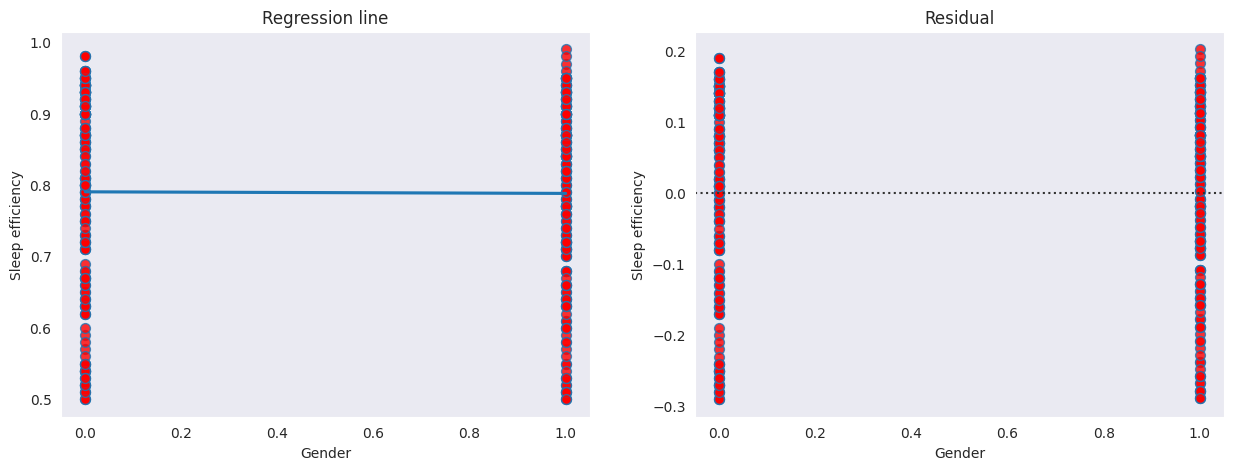

In [32]:
# Gender
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Gender', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Gender', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Neither does sleep duration give us insight into sleep efficiency, only that most people sleep for around 7 to 8 hours.

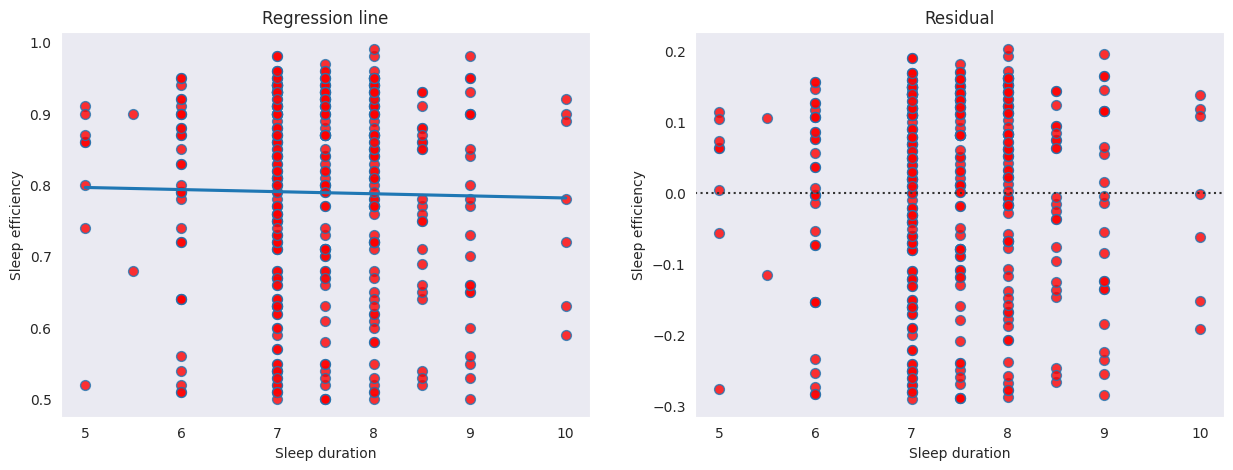

In [33]:
# Sleep duration
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Sleep duration', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Sleep duration', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Examining REM sleep percentage, we can see that the lower part of the graph gets sparser as REM sleep percentage increases.

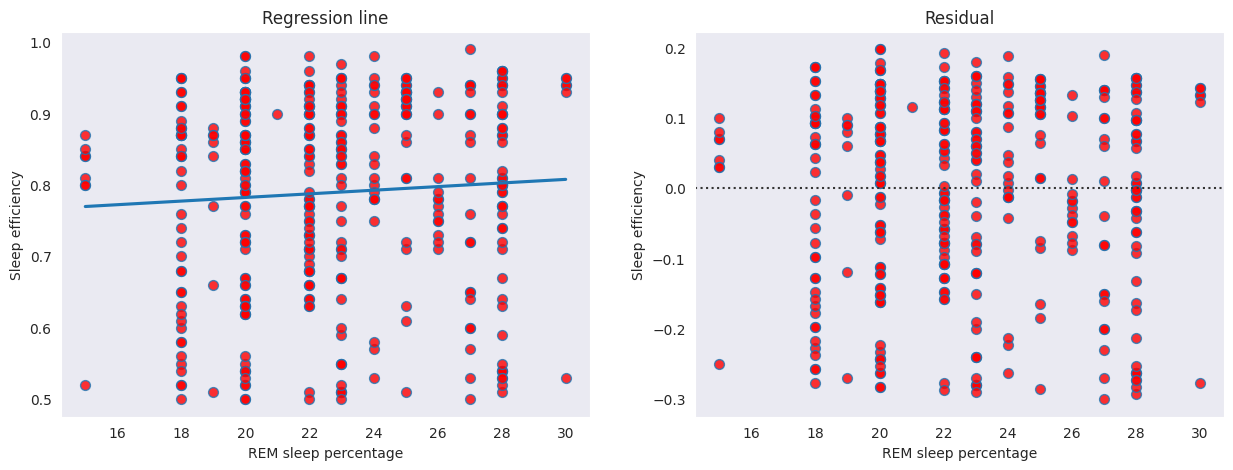

In [34]:
# REM sleep
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='REM sleep percentage', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='REM sleep percentage', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Below, it can be seen that, as deep sleep percentage increases, sleep efficiency increases.

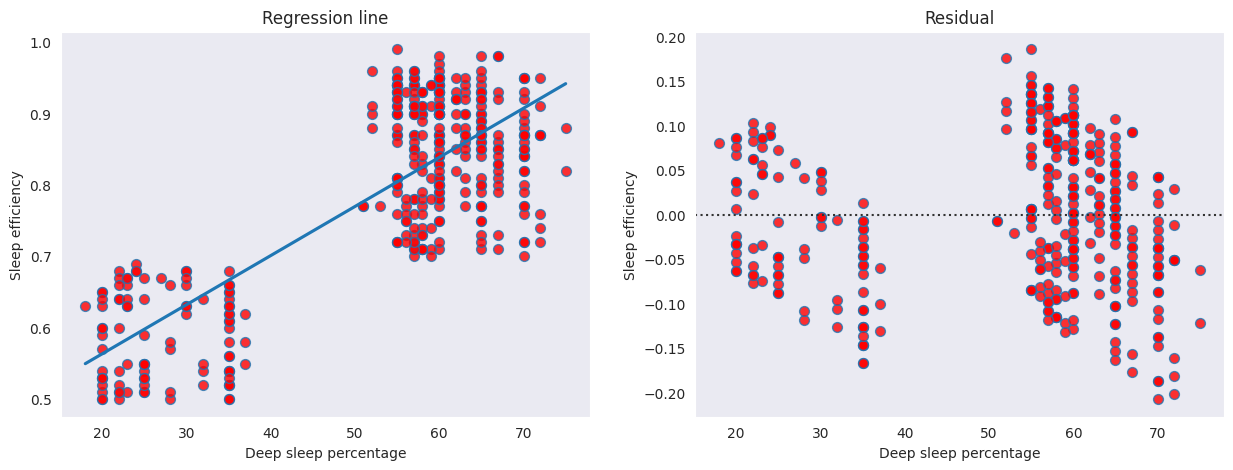

In [35]:
# Deep Sleep
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Deep sleep percentage', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Deep sleep percentage', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

On the other hand, as light sleep percentage increases, sleep efficiency decreases.

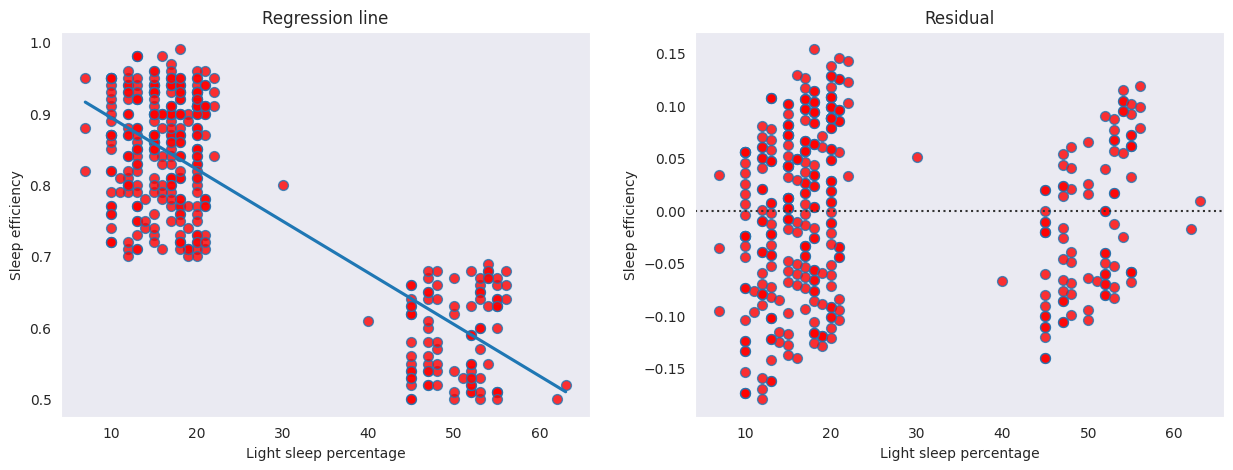

In [36]:
# Light sleep
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Light sleep percentage', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Light sleep percentage', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Below, it can be seen that, as the number of awakenings increase, the lower the sleep efficiency.

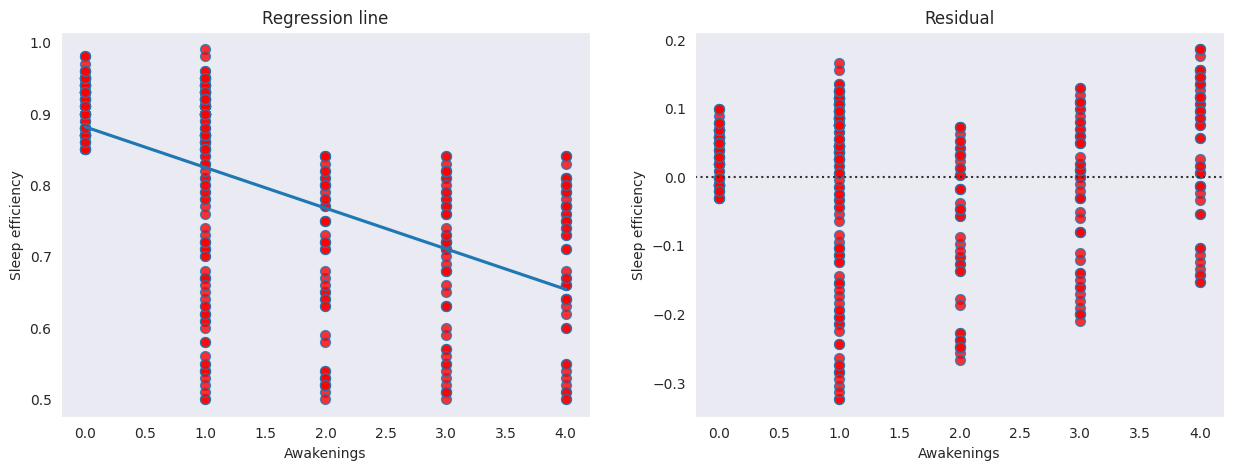

In [37]:
# Awakenings
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Awakenings', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Awakenings', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Caffeine consumption does not appear to have a linear relationship with sleep efficiency.

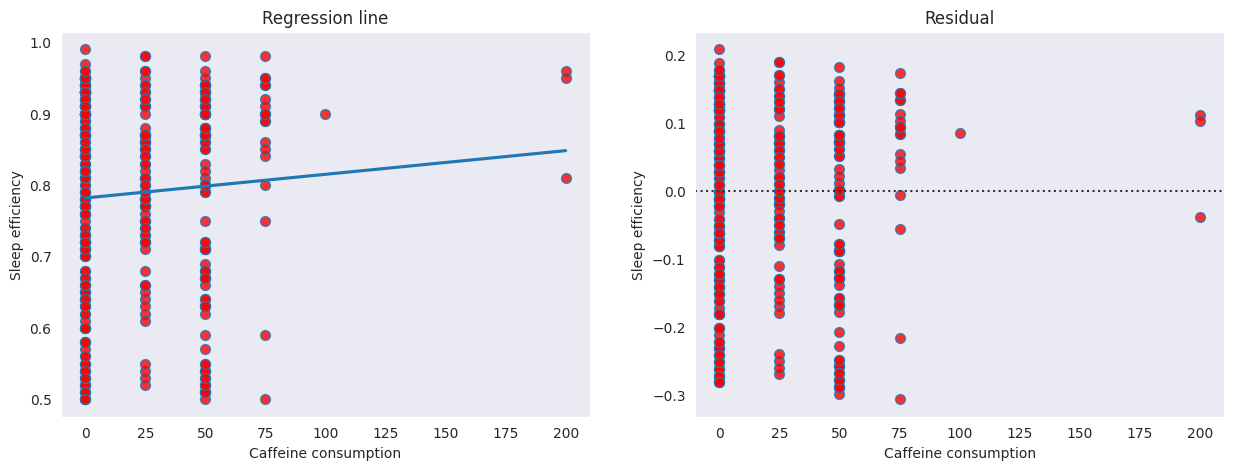

In [38]:
# Caffeine
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Caffeine consumption', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Caffeine consumption', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

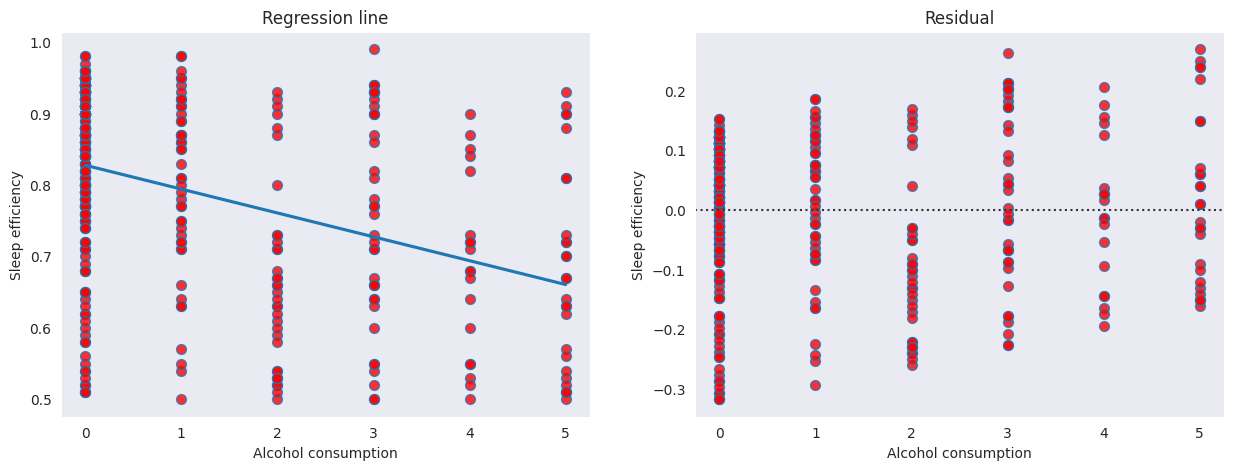

In [39]:
# Alcohol
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Alcohol consumption', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Alcohol consumption', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

People who smoke, on average, have a lower sleep efficiency.

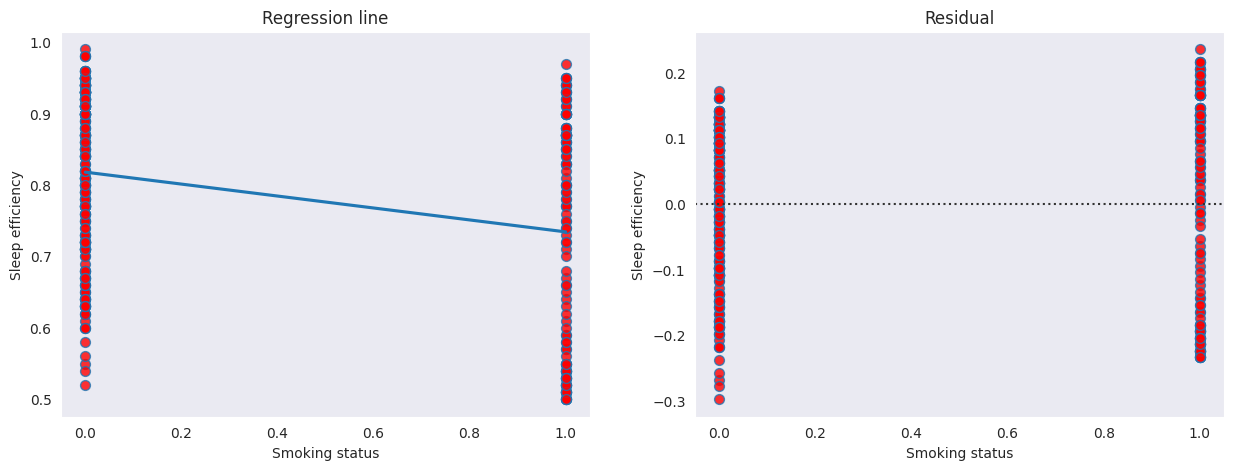

In [40]:
# Smoking
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Smoking status', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Smoking status', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

Below, the graph gets sparser at the bottom as exercise frequency increases, indicating that exercise frequency may have a linear relationship with sleep efficiency.

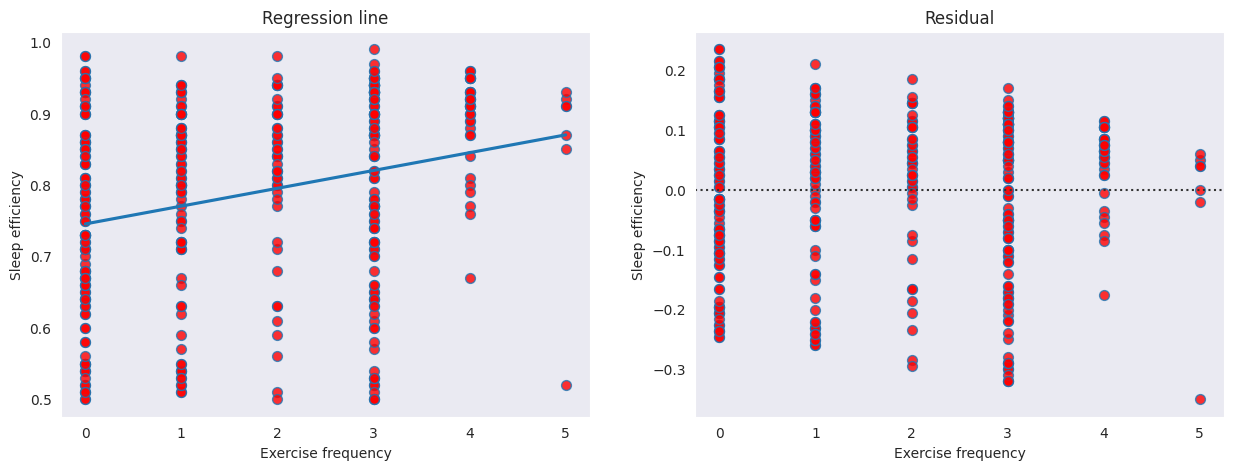

In [41]:
# Exercise
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].set_title('Regression line')
ax[1].set_title('Residual')
sns.regplot(data, x='Exercise frequency', y='Sleep efficiency', ax=ax[0], ci=None, scatter_kws={'s':50, 'facecolor':'red'})
sns.residplot(data, x='Exercise frequency', y='Sleep efficiency', ax=ax[1], scatter_kws={'s':50, 'facecolor':'red'})
sns.set_style('dark')

### **Feature selection**
Based from the correlation heatmap, regression plot, and residuals, we select the features that appear to have a linear relationship with sleep efficiency.



In [42]:
# Pick features
# feature_cols = ['Age', 'Gender', 'Sleep duration', 'REM sleep percentage',
#                 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
#                 'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
#                 'Exercise frequency']
feature_cols = ['Age', 'REM sleep percentage', 'Deep sleep percentage',
                'Light sleep percentage', 'Awakenings', 'Alcohol consumption',
                'Smoking status', 'Exercise frequency']
response_col = 'Sleep efficiency'

X = data[feature_cols]
y = data[response_col]

print(X)
print(y)

     Age  REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0     65                    18                     70                      12   
1     69                    19                     28                      53   
2     40                    20                     70                      10   
3     40                    23                     25                      52   
4     57                    27                     55                      18   
..   ...                   ...                    ...                     ...   
445   30                    28                     20                      52   
447   27                    22                     57                      21   
448   52                    28                     57                      15   
450   45                    18                     72                      10   
451   18                    22                     23                      55   

     Awakenings  Alcohol co

### **Splitting dataset into train and test subsets**
In order to test our model later, we split the dataset into training and testing sets.

In [43]:
# Generate training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Fitting simple linear regression**
We then create the regression model and train it with the training set.

In [44]:
# Create model and fit data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.coef_

array([ 0.00095743,  0.00295881,  0.00118098, -0.00413979, -0.0327827 ,
       -0.00693568, -0.04968264,  0.00727315])

### **Predicting test set result**
In order to check the model's performance, we use the training set we split earlier.

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([0.89694854, 0.6405788 , 0.81069596, 0.84398712, 0.86798851,
       0.73425833, 0.77912792, 0.78729081, 0.9015136 , 0.60783231,
       0.85306318, 0.63139831, 0.89728948, 0.63601967, 0.87359162,
       0.7202645 , 0.51806262, 0.78389115, 0.84035923, 0.91142156,
       0.89849283, 0.80115908, 0.79870788, 0.76858872, 0.56734829,
       0.91671373, 0.86527582, 0.69348644, 0.74325308, 0.82083418,
       0.86116273, 0.83060056, 0.60584693, 0.88010133, 0.93088154,
       0.62062839, 0.5647326 , 0.85424913, 0.92930055, 0.79378941,
       0.91858307, 0.89803152, 0.93848579, 0.60414995, 0.86325087,
       0.94402085, 0.79016886, 0.8426165 , 0.90777991, 0.83338097,
       0.89338024, 0.85552827, 0.79924423, 0.8464462 , 0.64696808,
       0.49837844, 0.8879793 , 0.81858245, 0.86342991, 0.81614082,
       0.74612535, 0.79901679, 0.87585181, 0.78968914, 0.69757982,
       0.62647936, 0.63387682, 0.86794301, 0.91384145, 0.88409352,
       0.83290588, 0.58114666, 0.5608187 , 0.5359718 , 0.76051

In [46]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
313,0.86,0.896949
53,0.65,0.640579
199,0.83,0.810696
49,0.81,0.843987
403,0.87,0.867989
...,...,...
283,0.66,0.583996
243,0.75,0.799812
125,0.77,0.827133
18,0.98,0.909521


### **Checking residuals**

In [47]:
residuals = y_test - y_pred
residuals

313   -0.036949
53     0.009421
199    0.019304
49    -0.033987
403    0.002011
         ...   
283    0.076004
243   -0.049812
125   -0.057133
18     0.070479
340   -0.047153
Name: Sleep efficiency, Length: 117, dtype: float64

(array([ 2.,  3.,  7.,  9., 22., 10., 33., 19.,  4.,  8.]),
 array([-0.17728948, -0.14852944, -0.11976941, -0.09100937, -0.06224934,
        -0.03348931, -0.00472927,  0.02403076,  0.05279079,  0.08155083,
         0.11031086]),
 <BarContainer object of 10 artists>)

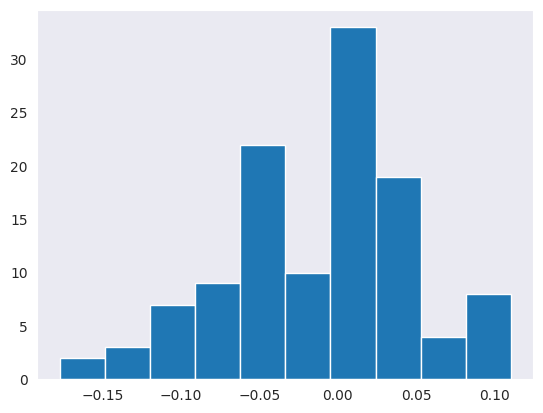

In [48]:
plt.hist(residuals)

### **Comparison of test data and predicted values**

Text(0, 0.5, 'Predictions')

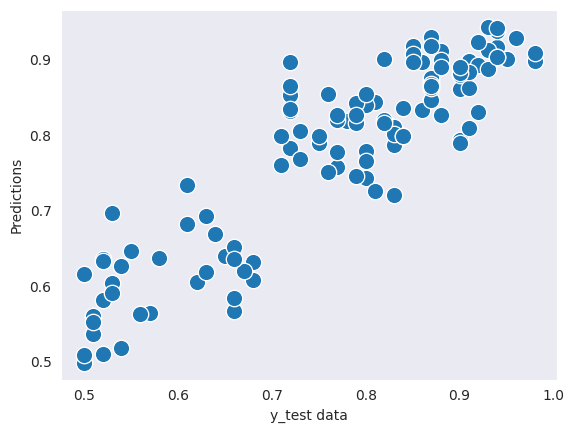

In [49]:
#sns.scatterplot(x=y_test, y = y_pred, ci=None, s=140)
sns.scatterplot(x=y_test, y = y_pred,s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

The values appear to align linearly, showing that the model is acceptable.

### **Evaluating linear regression model**

In [50]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:', r2_score(y_test,y_pred))

RMSE: 0.06111822988381243
R2: 0.8036371755672334


### **Comparing the current model with the original model**

In [51]:
feature_cols = ['Age', 'Gender', 'Sleep duration', 'REM sleep percentage',
                 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                 'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
                 'Exercise frequency']
response_col = 'Sleep efficiency'

X = data[feature_cols]
y = data[response_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:', r2_score(y_test,y_pred))

RMSE: 0.06125706136416176
R2: 0.8027440769274614


We can see that the RMSE lowered and the R2 score increased after modifying the preprocessing.

### **Conclusion**

We can conclude that the linear regression model we built worked fine in predicting the sleep efficiency based on 'Age', 'REM sleep percentage', 'Deep sleep percentage',
'Light sleep percentage', 'Awakenings', 'Alcohol consumption', 'Smoking status', 'Exercise frequency', since the R2 Score was relatively high (0.803 R2 Score) and the RMSE is relatively low (0.061).